# Preparación de Datos y Visualización

## Objetivos

- Entender mediante un ejemplo algunos casos de
   - Validaciones y limpieza de datos
   - Transformaciones
- Mostrar un ejemplo de visualización de datos efectiva

<a id='Indice'></a>
## Índice
[Inicio ▲](#Indice)

1. [Dependencias](#Dependencias)
1. [Funciones](#Funciones)
1. [Adquisición de Datos](#Adquisicion)
1. [Transformaciones](#Transformaciones)
1. [Visualización](#Visualizacion)
1. [Ejercicio (OPCIONAL)](#Ejercicio)
1. [Bibliografía](#Bibliografia)

<a id='Dependencias'></a>
## Dependencias
[Inicio ▲](#Indice)

**Instalación de dependencias**

In [1]:
install.packages("tm")  # for text mining
install.packages("SnowballC") # for text stemming
install.packages("wordcloud") # word-cloud generator 
install.packages("RColorBrewer") # color palettes

**Carga de dependencias**

In [1]:
library("downloader") 
library("dplyr")
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: NLP
Loading required package: RColorBrewer


<a id='Funciones'></a>
## Funciones
[Inicio ▲](#Indice)

In [7]:
dataFrameFromCSV <- function(filename, encoding="UTF-8") {
    delim = "," 
    dec = "."
    quote = "\""
    dataFrame <- read.csv(filename, header=TRUE, sep=delim, quote=quote, dec=dec,
                         encoding=encoding)
    
    return(dataFrame)
}

<a id='Adquisicion'></a>
## Adquisición de Datos
[Inicio ▲](#Indice)

Para este ejemplo vamos a utilizar el dataset de censo de arbolado de la ciudad de Montevideo, con el cual ya hemos trabajado cuando estudiamos la etapa de Entendimiento de Datos y vimos como hacer un data profiling. En particular vamos a cargar solamente los datos de tres centros zonales.

Información del dataset disponible en: https://catalogodatos.gub.uy/dataset/censo-de-arbolado-2008

### Problemas
Algunos de los archivos csv del dataset completo, tienen pequeños problemas estructurales que deben solucionarse para realizar la carga completa de los datos.

**Problema con nombres de columnas**

Los siguientes documentos tenían diferentes nombres de columnas que el resto, por lo que primero debemos remplazar el cabezal o de lo contrario no podremos hacer el bind entre los datasets.

- archivo_comunal16.csv
- archivo_comunal1.csv

**Columna adicional**
    
A diferencia del resto del dataset, el documento archivo_comunal8.csv tiene una columna extra, lo cual impide el \"bind\" de los datos de este documento con los otros. Analizando el contenido del documento, puede notarse que la columna extra, es la última columna y está vacía. Por lo tanto, podemos interpretarlo como un descuido en el armado del dataset y suprimirla.

*Solución*:

Remmplazar con la expresión regular ```,,\\n``` por ```,\\n```.

'archivo_comunal8.csv':
Ultima columna no tiene nombre y todas las filas tiene doble , al final.
,,\n
,\n

Archivos con problemas 'archivo_comunal16.csv',

In [3]:
files <- c(
          'archivo_comunal1.csv', 
          'archivo_comunal2.csv', 
          'archivo_comunal3.csv', 
          'archivo_comunal4.csv',
          'archivo_comunal5.csv',
          'archivo_comunal6.csv',
          'archivo_comunal7.csv',
          'archivo_comunal8.csv',
          'archivo_comunal9.csv',
          'archivo_comunal10.csv',
          'archivo_comunal11.csv',
          'archivo_comunal12.csv',
          'archivo_comunal13.csv',
          'archivo_comunal14.csv',
          'archivo_comunal15.csv',
          'archivo_comunal16.csv',
          'archivo_comunal17.csv',
          'archivo_comunal18.csv'
)

dataFrame <- NULL
for (i in 1:length(files)) { 
    fileName <- files[i]
    part <- dataFrameFromCSV(fileName)
    dataFrame <- rbind(dataFrame, part)
}

Warning message in `[<-.factor`(`*tmp*`, ri, value = c(226551L, 226552L, 226553L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(7641L, 7641L, 7641L, 7641L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(3348L, 3348L, 3348L, 3348L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(3840L, 3840L, 3840L, 3840L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(3426L, 3426L, 3440L, 3440L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(4L, 4L, 4L, 4L, 4L, 4L, 4L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(15L, 80L, 3L, 141L, 220L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*tmp*`, ri, value = c(2L, 2L, 1L, 3L, 4L, 3L, 3L, :
“invalid factor level, NA generated”Warning message in `[<-.factor`(`*t

In [4]:
colnames(dataFrame)

[1] "Arbol"             "Cod_calle"         "Calle"            
 [4] "Cod_Entre"         "Entre"             "Cod_Y"            
 [7] "Y"                 "Numero"            "Ajuste"           
[10] "Acera"             "Alineacion"        "Ordinal"          
[13] "Ancho.Vereda"      "Distancia"         "CAP"              
[16] "Altura"            "Diametro.Copa"     "EV"               
[19] "Int.Aerea"         "Int.Sub"           "Genero"           
[22] "Especie"           "Nombre.científico"

In [5]:
# Recordemos cuantos datos estamos analizando
dim(dataFrame)

[1] 211512     23

In [9]:
head(dataFrame, 5)

Arbol,Cod_calle,Calle,Cod_Entre,Entre,Cod_Y,Y,Numero,Ajuste,Acera,⋯,Distancia,CAP,Altura,Diametro.Copa,EV,Int.Aerea,Int.Sub,Genero,Especie,Nombre.científico
233247,7572,18 DE JULIO AVENIDA,2361,ACEVEDO DIAZ EDUARDO,7656,8 DE OCTUBRE AVENIDA,2261,,I,⋯,4,165,17,10,2,N,S,63,1,Platanus x acerifolia
233248,7572,18 DE JULIO AVENIDA,2361,ACEVEDO DIAZ EDUARDO,7656,8 DE OCTUBRE AVENIDA,2251,,I,⋯,4,159,17,11,2,N,S,63,1,Platanus x acerifolia
233426,7572,18 DE JULIO AVENIDA,4104,MAGALLANES,2853,GABOTO,1734,,P,⋯,4,52,5,6,2,S,N,39,1,Jacaranda ovalifolia
233427,7572,18 DE JULIO AVENIDA,4104,MAGALLANES,2853,GABOTO,1720,,P,⋯,5,85,5,6,3,S,S,39,1,Jacaranda ovalifolia
235631,7572,18 DE JULIO AVENIDA,4692,NARVAJA TRISTAN,87,ACEVEDO EDUARDO,1803,,I,⋯,4,169,15,10,2,S,S,63,1,Platanus x acerifolia


In [11]:
str(dataFrame)

'data.frame':	211512 obs. of  23 variables:
 $ Arbol            : Factor w/ 182460 levels "1","100","1000",..: 792 793 794 4341 4342 4343 4344 4345 4346 4347 ...
 $ Cod_calle        : Factor w/ 2124 levels "","126","1482",..: 77 77 77 77 77 77 77 77 77 77 ...
 $ Calle            : Factor w/ 2724 levels "","18 DE JULIO AVENIDA",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Cod_Entre        : Factor w/ 2180 levels ""," Entre","0",..: 56 56 56 35 35 35 36 36 36 36 ...
 $ Entre            : Factor w/ 2788 levels "","18 DE JULIO AVENIDA",..: 38 38 38 67 67 67 5 5 5 5 ...
 $ Cod_Y            : Factor w/ 2219 levels ""," Y","0","1122",..: 70 70 70 38 38 38 43 43 43 43 ...
 $ Y                : Factor w/ 5581 levels "","18 DE JULIO AVENIDA",..: 75 75 75 9 9 9 23 23 23 23 ...
 $ Numero           : Factor w/ 7270 levels ""," Numero","0",..: 1 1 1 1050 1053 3 1063 1063 1087 1092 ...
 $ Ajuste           : Factor w/ 2276 levels "",".","0","1006",..: 186 186 186 1 1 184 1 1 1 1 ...
 $ Acera            : Factor w/ 

### Códigos de Especie

In [8]:
fileName <- "codigos-de-especie.csv"
codesDf <- dataFrameFromCSV(fileName)

In [9]:
head(codesDf)

Codigo.Género,Código.especie,Nombre.Científico,Nombre.común,porte
111,1,Abelia grandiflora,Abelia,Ao
143,2,Abies nordmanniana,Abeto nordmaniana,Al
143,1,Abies pinsapo,Abeto pinsapo,Al
259,1,Abutilon molle,Farolito chino,Ao
10,6,Acacia baileyana,A. baileyana,Al
10,9,Acacia bonariensis,Uña de Gato,Ao


In [10]:
str(codesDf)

'data.frame':	540 obs. of  5 variables:
 $ Codigo.Género    : int  111 143 143 259 10 10 10 10 10 10 ...
 $ Código.especie   : int  1 2 1 1 6 9 1 2 8 3 ...
 $ Nombre.Científico: Factor w/ 540 levels "Abelia grandiflora",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Nombre.común     : Factor w/ 502 levels "A. baileyana",..: 9 10 11 252 1 487 237 13 249 20 ...
 $ porte            : Factor w/ 6 levels "Al","Ao","He",..: 2 1 1 2 1 2 1 1 1 1 ...


<a id='Transformaciones'></a>
## Transformaciones
[Inicio ▲](#Indice)

Vamos a estudiar cuales son las especies de árboles más comunes en la ciudad de Montevideo, para ello primero tenemos que aplicar algunas transformaciones a los datos.

In [ ]:
dat %>% mutate_each_(funs(factor), l1) %>% mutate_each_(funs(as.numeric), l2)
dataset <- mutate_all(dataset, funs(as.numeric))

dataFrame <- dataFrame %>% mutate_at(c("Genero"), funs(as.numeric))


In [6]:
# Cargo los datos como Corupus de la libreria tm
corpus = Corpus(VectorSource(dataFrame$Nombre.científico)) 

inspect(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Remplazo caracteres especiales como /, @, | y espacios en blanco por el caracter "-" para eliminar variantes de una misma especie de árbol.

In [11]:
toScore <- content_transformer(function (x , pattern ) gsub(pattern, "-", x))
                               
corpus <- tm_map(corpus, toScore, "/")
corpus <- tm_map(corpus, toScore, "@")
corpus <- tm_map(corpus, toScore, "\\|")
corpus <- tm_map(corpus, toScore, " ")

Warning message in tm_map.SimpleCorpus(corpus, toScore, "/"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, toScore, "@"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, toScore, "\\|"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, toScore, " "):
“transformation drops documents”

Aplico algunas transformaciones básicas para uniformizar los valores de texto, eliminando errores de tipeo, stropwords del lenguaje que esconden variantes de una misma especie de árbol, simbolos de puntuación, etc.

In [12]:
# Convierto texto a minúscula (lowercase)
corpus <- tm_map(corpus, content_transformer(tolower))
# Elimino numeros 
corpus <- tm_map(corpus, removeNumbers)
# Elimino stopwords comunes en español
corpus <- tm_map(corpus, removeWords, stopwords("spanish"))
# Elimino punctuations
corpus <- tm_map(corpus, removePunctuation)
# Elimino extra white spaces
corpus <- tm_map(corpus, stripWhitespace)
# Text stemming
# corpus <- tm_map(corpus, stemDocument)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("spanish")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”

In [13]:
stopwords("spanish")

[1] "de"           "la"           "que"          "el"           "en"          
  [6] "y"            "a"            "los"          "del"          "se"          
 [11] "las"          "por"          "un"           "para"         "con"         
 [16] "no"           "una"          "su"           "al"           "lo"          
 [21] "como"         "más"          "pero"         "sus"          "le"          
 [26] "ya"           "o"            "este"         "sí"           "porque"      
 [31] "esta"         "entre"        "cuando"       "muy"          "sin"         
 [36] "sobre"        "también"      "me"           "hasta"        "hay"         
 [41] "donde"        "quien"        "desde"        "todo"         "nos"         
 [46] "durante"      "todos"        "uno"          "les"          "ni"          
 [51] "contra"       "otros"        "ese"          "eso"          "ante"        
 [56] "ellos"        "e"            "esto"         "mí"           "antes"       
 [61] "algunos"      "qué"          "unos"         "yo"           "otro"        
 [66] "otras"        "otra"         "él"           "tanto"        "esa"         
 [71] "estos"        "mucho"        "quienes"      "nada"         "muchos"      
 [76] "cual"         "poco"         "ella"         "estar"        "estas"       
 [81] "algunas"      "algo"         "nosotros"     "mi"           "mis"         
 [86] "tú"           "te"           "ti"           "tu"           "tus"         
 [91] "ellas"        "nosotras"     "vosotros"     "vosotras"     "os"          
 [96] "mío"          "mía"          "míos"         "mías"         "tuyo"        
[101] "tuya"         "tuyos"        "tuyas"        "suyo"         "suya"        
[106] "suyos"        "suyas"        "nuestro"      "nuestra"      "nuestros"    
[111] "nuestras"     "vuestro"      "vuestra"      "vuestros"     "vuestras"    
[116] "esos"         "esas"         "estoy"        "estás"        "está"        
[121] "estamos"      "estáis"       "están"        "esté"         "estés"       
[126] "estemos"      "estéis"       "estén"        "estaré"       "estarás"     
[131] "estará"       "estaremos"    "estaréis"     "estarán"      "estaría"     
[136] "estarías"     "estaríamos"   "estaríais"    "estarían"     "estaba"      
[141] "estabas"      "estábamos"    "estabais"     "estaban"      "estuve"      
[146] "estuviste"    "estuvo"       "estuvimos"    "estuvisteis"  "estuvieron"  
[151] "estuviera"    "estuvieras"   "estuviéramos" "estuvierais"  "estuvieran"  
[156] "estuviese"    "estuvieses"   "estuviésemos" "estuvieseis"  "estuviesen"  
[161] "estando"      "estado"       "estada"       "estados"      "estadas"     
[166] "estad"        "he"           "has"          "ha"           "hemos"       
[171] "habéis"       "han"          "haya"         "hayas"        "hayamos"     
[176] "hayáis"       "hayan"        "habré"        "habrás"       "habrá"       
[181] "habremos"     "habréis"      "habrán"       "habría"       "habrías"     
[186] "habríamos"    "habríais"     "habrían"      "había"        "habías"      
[191] "habíamos"     "habíais"      "habían"       "hube"         "hubiste"     
[196] "hubo"         "hubimos"      "hubisteis"    "hubieron"     "hubiera"     
[201] "hubieras"     "hubiéramos"   "hubierais"    "hubieran"     "hubiese"     
[206] "hubieses"     "hubiésemos"   "hubieseis"    "hubiesen"     "habiendo"    
[211] "habido"       "habida"       "habidos"      "habidas"      "soy"         
[216] "eres"         "es"           "somos"        "sois"         "son"         
[221] "sea"          "seas"         "seamos"       "seáis"        "sean"        
[226] "seré"         "serás"        "será"         "seremos"      "seréis"      
[231] "serán"        "sería"        "serías"       "seríamos"     "seríais"     
[236] "serían"       "era"          "eras"         "éramos"       "erais"       
[241] "eran"         "fui"          "fuiste"       "fue"          "fuimos"      
[246] "fuisteis"     "fueron"    

**Term-Document matrix**

Una matriz término-documento es una tabla que contiene la frequencia de cada palabra en un conjunto de documentos. Mientras que en las columnas se colocan todas las palabras, en las filas se colocan todos los documentos analizados. De esta forma se tiene la cantidad de ocurrencias de cada palabra en cada documento.

Ver https://en.wikipedia.org/wiki/Document-term_matrix.

In [14]:
dtm <- TermDocumentMatrix(corpus)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)

head(d, 25)

,word,freq
platanusxacerifolia,platanusxacerifolia,8042
fraxinuslanceolata,fraxinuslanceolata,6923
meliaazedarach,meliaazedarach,4661
tipuanatipu,tipuanatipu,1877
ulmusprocera,ulmusprocera,1300
acernegundo,acernegundo,1082
fraxinusexcelsior,fraxinusexcelsior,814
acersaccharinum,acersaccharinum,444
jacarandaovalifolia,jacarandaovalifolia,434
neriumoleander,neriumoleander,318


<a id='Visualizacion'></a>
## Visualización
[Inicio ▲](#Indice)

Vamos a ilustrar la importancia de cada especie de árbol a través de una visualizción de tipo *Wordcloud*.

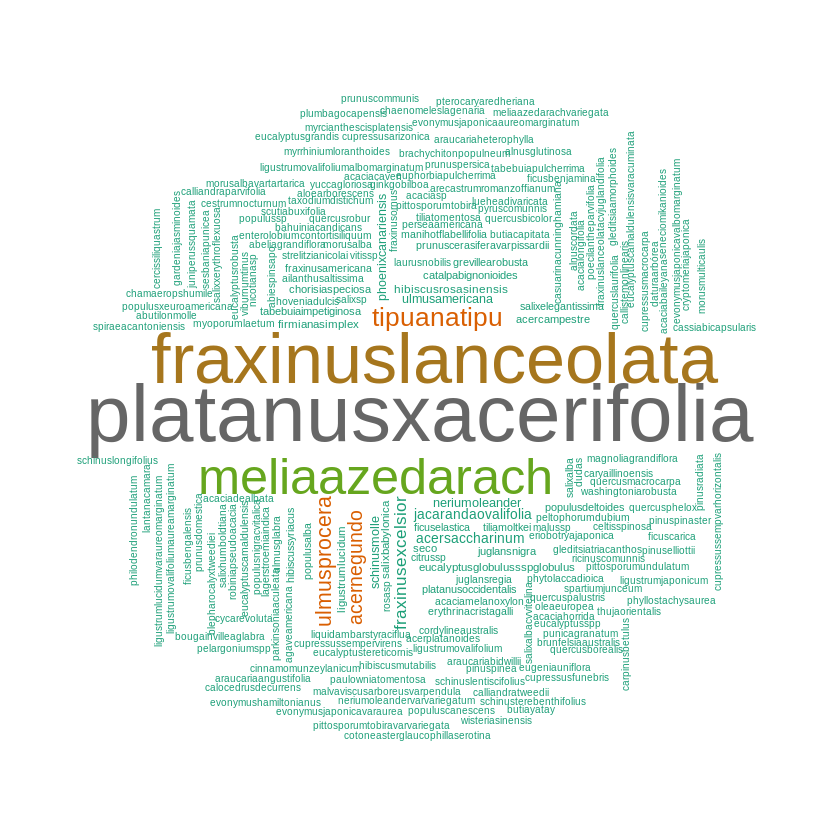

In [29]:
set.seed(1234)
wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

<a id='Ejercicio'></a>
## Ejercicio (OPCIONAL)
[Inicio ▲](#Indice)

Por simplicidad, en este documento analizamos solamente 3 de los 18 set de datos disponibles en la fuente de datos. Partiendo de que en la fuente, cada archivo se corresponde con un centro zonal de Montevideo, entonces hemos analizado solamente 3 de los 15 centros zonales en Montevideo. Esto quiere decir que nuestro análisis de datos podría no ser representativo de todo Montevideo. 

Modificar este Jupyter Notebook incluyendo la carga para los 18 archivos .CSV disponibles en la fuente de datos.

<ol>
    <li>¿Cambia la wordcloud? ¿Aparecen especies nuevas?</li>
    <li>En el ejemplo cargamos 3 archivos, por lo que no hay problema en hacerlo de forma declarativa. Ahora que tiene que cargar 18 archivos ¿Cómo codifico la carga de los archivos CSV a un único data frame?</li>
</ol>

Información del dataset disponible en: https://catalogodatos.gub.uy/dataset/censo-de-arbolado-2008

<a id='Bibliografia'></a>
## Bilbiografía
[Inicio ▲](#Indice)